In [2]:
import numpy as np
import matplotlib.pyplot as  plt
import plotly.express as px

# Polarization

## Emap

In [3]:
# temperature
T=9.
kB=8.6173303e-5
beta = 1 / (kB * T)

# rixs = np.load(witness.folder+'/rixs_Mmap.npz')
rixs = np.load('pol/rixs_Emap.npz')
rixs_con = np.load('pol/conjugate_rixs_Emap.npz')
rixs = dict(rixs)
rixs1 = rixs['rixs'][0]
rixs2 = rixs['rixs'][1]
rixs_con = dict(rixs_con)
rixs1_con = rixs_con['rixs'][0]
rixs2_con = rixs_con['rixs'][1]

omega = (rixs['omega']+11774.5) / 1000
eloss = rixs['eloss']
factor = 2 * np.tanh(beta * eloss / 2) * (1-np.exp(-beta * eloss) )

# element-wise multiplication along axis 'eloss'
given_axis = 1
dim = np.ones((1,rixs1.ndim),int).ravel()
dim[given_axis] = -1
factor_reshaped = factor.reshape(dim)
summand1 = rixs1 * factor_reshaped + rixs1_con * factor_reshaped
summand2 = rixs2 * factor_reshaped + rixs2_con * factor_reshaped

# integration over eloss to get nominator
step = eloss[1] - eloss[0]

chooser = eloss > 0.5
summand1_chooser = summand1[:,chooser]
summand2_chooser = summand2[:,chooser]
nominator1 = np.sum(summand1_chooser, axis=1)*step
nominator2 = np.sum(summand2_chooser, axis=1)*step

In [23]:
FQ_Emap = dict(np.load('pol/FQ_Emap.npz'))
FQ = FQ_Emap['FQ']
# FQ[0][94:] *= 12

In [24]:
FQ[0][94:]

array([0.00104143, 0.0010028 , 0.00096629, 0.00093175, 0.00089904,
       0.00086803])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


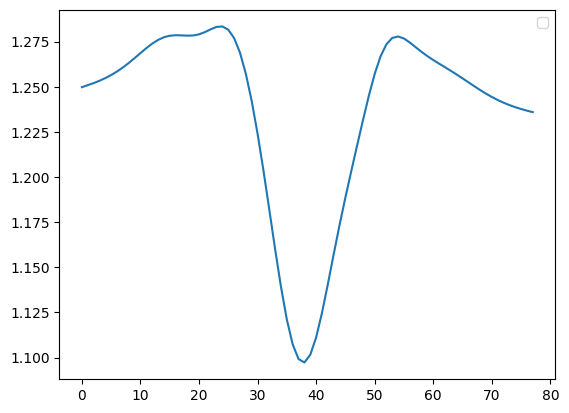

In [29]:
# plt.plot(nominator1, label='experiment')
# plt.plot(FQ[0], label='pure state')
plt.plot(nominator1[2:80]/FQ[0][2:80])
plt.legend()
plt.show()

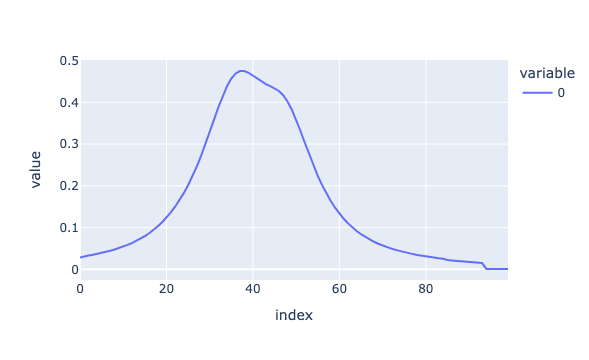

In [9]:
fig = px.line(FQ[0])
fig.show()

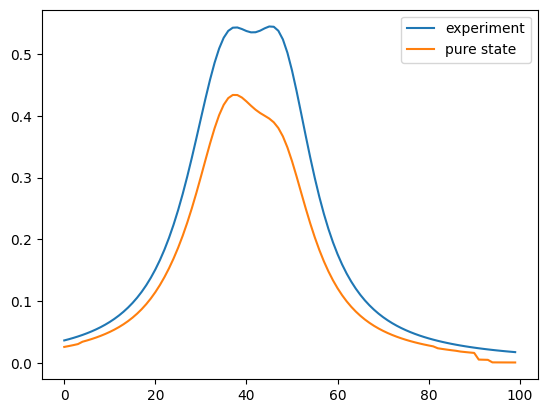

In [5]:
plt.plot(nominator2, label='experiment')
plt.plot(FQ[1], label='pure state')
plt.legend()
plt.show()

## Mmap

In [6]:
# temperature
T=9.
kB=8.6173303e-5
beta = 1 / (kB * T)

# rixs = np.load(witness.folder+'/rixs_Emap.npz')
rixs = np.load('pol/rixs_Mmap.npz')
rixs_con = np.load('pol/conjugate_rixs_Mmap.npz')
rixs = dict(rixs)
rixs1 = rixs['rixs'][:,0,:]
rixs2 = rixs['rixs'][:,1,:]
rixs_con = dict(rixs_con)
rixs1_con = rixs_con['rixs'][:,0]
rixs2_con = rixs_con['rixs'][:,1]

momenta = rixs['momenta']
eloss = rixs['eloss']
factor = 2 * np.tanh(beta * eloss / 2) * (1-np.exp(-beta * eloss) )

# element-wise multiplication along axis 'eloss'
given_axis = 1
dim = np.ones((1,rixs1.ndim),int).ravel()
dim[given_axis] = -1
factor_reshaped = factor.reshape(dim)
summand1 = rixs1 * factor_reshaped + rixs1_con * factor_reshaped
summand2 = rixs2 * factor_reshaped + rixs2_con * factor_reshaped

# integration over eloss to get nominator
step = eloss[1] - eloss[0]

chooser = eloss > 0.5
summand1_chooser = summand1[:,chooser]
summand2_chooser = summand2[:,chooser]
nominator1 = np.sum(summand1_chooser, axis=1)*step
nominator2 = np.sum(summand2_chooser, axis=1)*step

In [7]:
FQ_Emap = dict(np.load('pol/FQ_Mmap.npz'))
FQ = FQ_Emap['FQ']

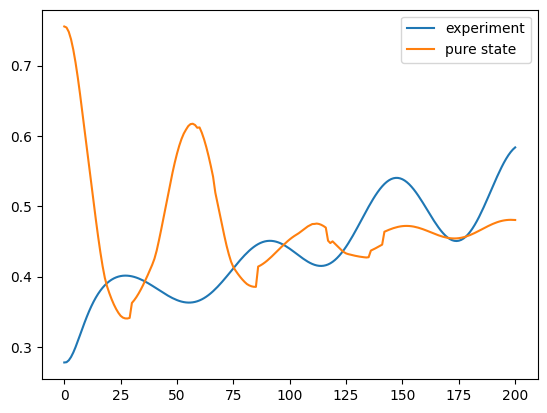

In [11]:
plt.plot(nominator1, label='experiment')
plt.plot(FQ[0], label='pure state')
plt.legend()
plt.show()

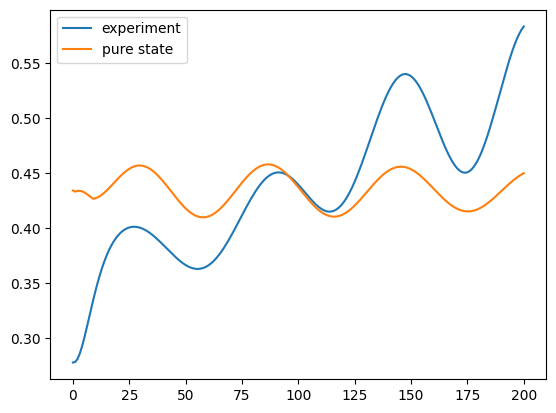

In [12]:
plt.plot(nominator1, label='experiment')
plt.plot(FQ[1], label='pure state')
plt.legend()
plt.show()

# Sum

## Emap

In [13]:
# theoretical QFI
# temperature
T=9.
kB=8.6173303e-5
beta = 1 / (kB * T)

rixs = np.load('sum/rixs_Emap.npz')
rixs_con = np.load('sum/conjugate_rixs_Emap.npz')
rixs = dict(rixs)
rixs1 = rixs['rixs']
rixs_con = dict(rixs_con)
rixs1_con = rixs_con['rixs']

omega = (rixs['omega']+11774.5) / 1000
eloss = rixs['eloss']
factor = 2 * np.tanh(beta * eloss / 2) * (1-np.exp(-beta * eloss) )

# element-wise multiplication along axis 'eloss'
given_axis = 1
dim = np.ones((1,rixs1.ndim),int).ravel()
dim[given_axis] = -1
factor_reshaped = factor.reshape(dim)
summand = rixs1 * factor_reshaped + rixs1_con * factor_reshaped

# integration over eloss to get nominator
step = eloss[1] - eloss[0]

chooser = eloss > 0.5
summand_chooser = summand[:,chooser]
nominator = np.sum(summand_chooser, axis=1)*step

In [14]:
FQ_Emap = dict(np.load('sum/FQ_Emap.npz'))
FQ = FQ_Emap['FQ']

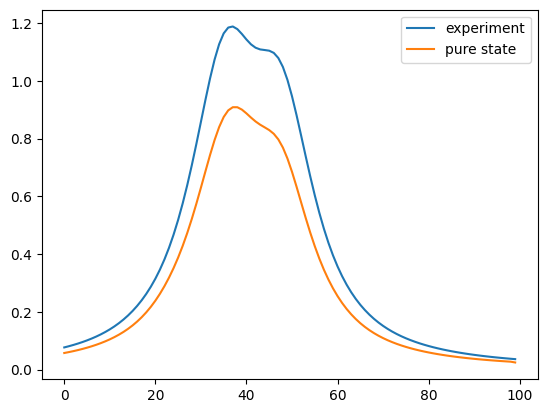

In [15]:
plt.plot(nominator, label='experiment')
plt.plot(FQ, label='pure state')
plt.legend()
plt.show()

## Mmap

In [16]:
# theoretical QFI
# temperature
T=9.
kB=8.6173303e-5
beta = 1 / (kB * T)

rixs = np.load('sum/rixs_Mmap.npz')
rixs_con = np.load('sum/conjugate_rixs_Mmap.npz')
rixs = dict(rixs)
rixs1 = rixs['rixs']
rixs_con = dict(rixs_con)
rixs1_con = rixs_con['rixs']

d = 2.53614
Lfactor = 0.426991866 * d / (2*np.pi)
Ls = np.arange(0.0, 20.1, 0.1)
momenta = rixs['momenta']
newmomenta = Ls * Lfactor
eloss = rixs['eloss']
factor = 2 * np.tanh(beta * eloss / 2) * (1-np.exp(-beta * eloss) )

# element-wise multiplication along axis 'eloss'
given_axis = 1
dim = np.ones((1,rixs1.ndim),int).ravel()
dim[given_axis] = -1
factor_reshaped = factor.reshape(dim)
summand = rixs1 * factor_reshaped + rixs1_con * factor_reshaped

# integration over eloss to get nominator
step = eloss[1] - eloss[0]

chooser = eloss > 0.5
summand_chooser = summand[:,chooser]
nominator = np.sum(summand_chooser, axis=1)*step

In [17]:
FQ_Mmap = dict(np.load('sum/FQ_Mmap.npz'))
FQ = FQ_Mmap['FQ']

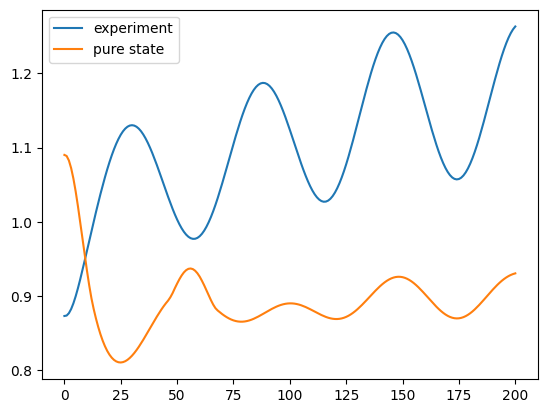

In [18]:
plt.plot(nominator, label='experiment')
plt.plot(FQ, label='pure state')
plt.legend()
plt.show()